In [1]:
# Imports
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
print('Loaded...')

Loaded...


In [2]:
# Define model
def model():
    var = sq.norm(1, 5)
    return sq.sample(var)

print('Loaded...')

Loaded...


-
Mean: 3.0, SD: 1.22
-
{1: 0.21,
 5: 1.0,
 10: 1.45,
 20: 1.97,
 30: 2.34,
 40: 2.68,
 50: 3.0,
 60: 3.29,
 70: 3.62,
 80: 4.02,
 90: 4.59,
 95: 5.0,
 99: 5.85}


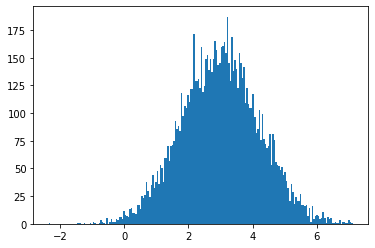

In [3]:
# Sample model
n_samples = 10000
samples = sq.sample(model, n=n_samples)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
plt.hist(samples, bins=200)
pprint(sq.get_percentiles(samples, digits=2))
